# Load Data

In [1]:
import os
import numpy as np
from PIL import Image # OpenCV does not support opening GIFs

# Get image filenames
filenames = [fn for fn in os.listdir("images") if os.path.isfile(f"images/{fn}")]

# Creates a list of dict in the format of ...
# [{'filename': <file name of image>, 'image': <numpy array of pixel values>}, ...]
images = []
for filename in filenames:
    image_path = f"images/{filename}"
    with Image.open(image_path) as image_pil:
        image = np.array(image_pil, dtype=bool)
    images.append({'filename': filename, 'image': image})

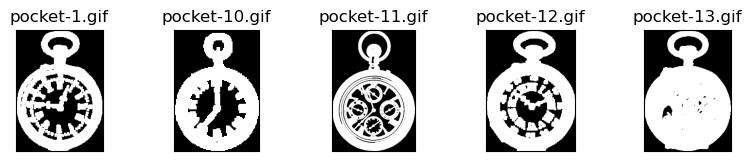

In [2]:
from utils import image_show
imgs = images[340:345]
fns = [image['filename'] for image in imgs]
imgs = [image['image'] for image in imgs]
image_show(imgs, fns)

# Morphologically open image

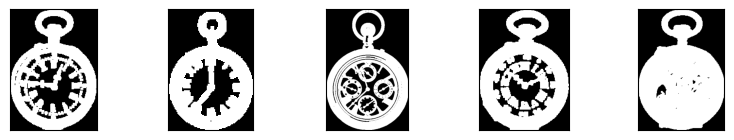

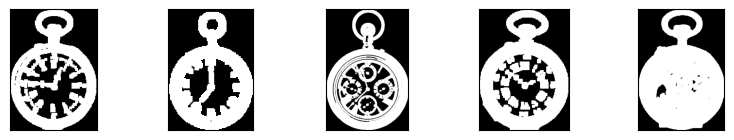

In [3]:
import cv2

imgs = [im['image'] for im in images[340:345]]

imgs_morph = []
for img in imgs:
    # Closing and opening
    kernel = np.ones((5, 5), np.uint8)
    img = img.astype(np.uint8)
    # img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations=1)
    img = img.astype(bool)
    imgs_morph.append(img)

image_show(imgs)
image_show(imgs_morph)

# Resize and convert RGB for CNN

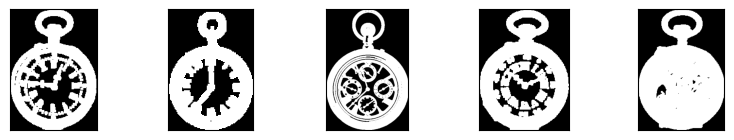

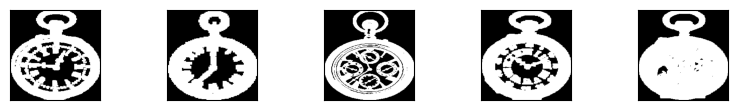

In [4]:
imgs = [im['image'] for im in images[340:345]]

imgs_resized = []
for img in imgs:
    # Resize to 224 x 224
    img = Image.fromarray(img)
    img = img.resize((224, 224), resample=Image.Resampling.LANCZOS)
    img = img.convert('RGB')
    img = np.array(img)
    imgs_resized.append(img)

image_show(imgs)
image_show(imgs_resized)

# Convert from binary to RGB

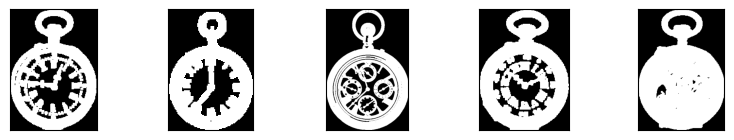

Shape of binary image:  (205, 147)


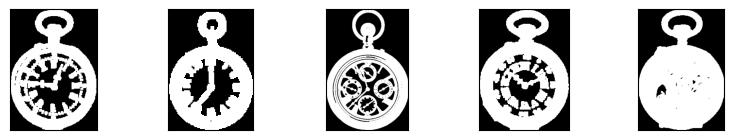

Shape of converted RGB image:  (205, 147, 3)


In [5]:
imgs = [im['image'] for im in images[340:345]]

imgs_rgb = []
for img in imgs:
    # Convert to RGB from binary
    img = Image.fromarray(img)
    img = img.convert('RGB')
    img = np.array(img)
    imgs_rgb.append(img)

image_show(imgs)
print("Shape of binary image: ", imgs[0].shape)
image_show(imgs_rgb)
print("Shape of converted RGB image: ", imgs_rgb[0].shape)

# Apply gaussian blur

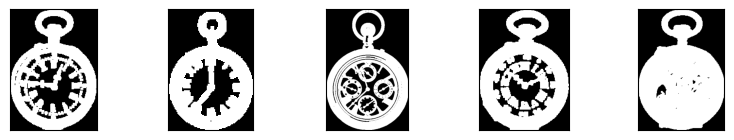

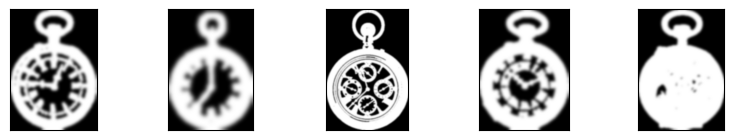

In [6]:
from torchvision.transforms.functional import gaussian_blur

imgs_blur = []
for img in imgs:
    # Convert to RGB from binary
    img = Image.fromarray(img)
    img = img.convert('RGB')
    
    # Blur image with kernel size 13 x 13
    img = gaussian_blur(img, (13, 13))
    
    img = np.array(img)
    imgs_blur.append(img)
    
image_show(imgs)
image_show(imgs_blur)

# Normalize

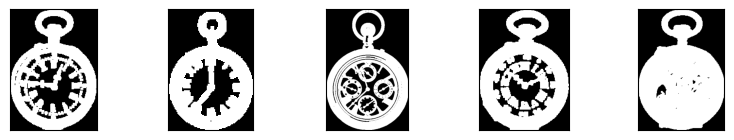

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


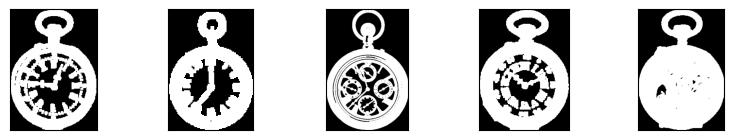

In [7]:
from torch import Tensor
from torchvision.transforms.functional import normalize

imgs = [im['image'] for im in images[340:345]]

imgs_norm = []
for img in imgs:
    # Convert to RGB
    img = Image.fromarray(img)
    img = img.convert('RGB')
    img = np.array(img)
    
    # Convert to tensor and normalize
    img = Tensor(img).permute((2, 0, 1))
    img = normalize(img, (0.8, 0.9, 0.9), (0.58, 0.5, 0.5))
    
    imgs_norm.append(img)
    
image_show(imgs)
image_show(imgs_norm)

# Mean and std dev for images

In [8]:
nimages = 0
mean = 0.0
var = 0.0

for img in images:
    img = img['image']
    img = Image.fromarray(img)
    img = img.resize((224, 224), resample=Image.Resampling.LANCZOS)
    img = img.convert('RGB')
    img = np.array(img)
    img = np.transpose(img, (2, 0, 1))
    img = np.expand_dims(img, 0)
    img = img.reshape(*img.shape[:2], -1)
    nimages += 1
    mean += img.mean(2).sum(0) 
    var += img.var(2).sum(0)

mean /= nimages
var /= nimages
std = np.sqrt(var)

print(mean/255, std/255)

[0.3807089 0.3807089 0.3807089] [0.45243995 0.45243995 0.45243995]
